## 04. SVD(Singular Value Decomposition)
#### SVD 개요: 특이값 분해 
- $ A = U\sum V^T $  A: mxn, U: mxm, $\sum$: mxn, $V^T$: nxn 
- mxn 크기의 행렬 A를 다음과 같이 분해하는 것
- U, V: 특이벡터 -> 서로 직교하는 성질 O
- $\sum$: 대각행렬 -> 대각에 위치한 값을 제외하고 모두 0의 값을 가짐 -> 행렬A의 특이값
  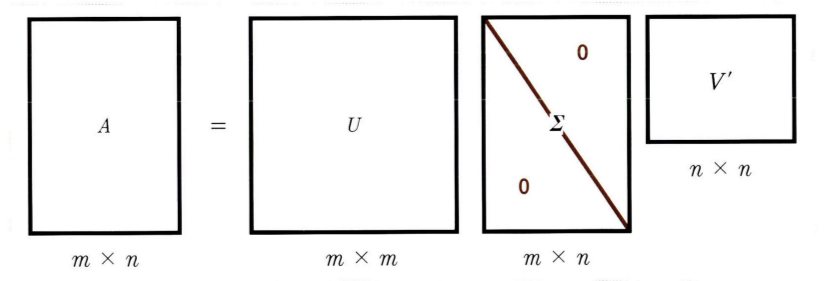
  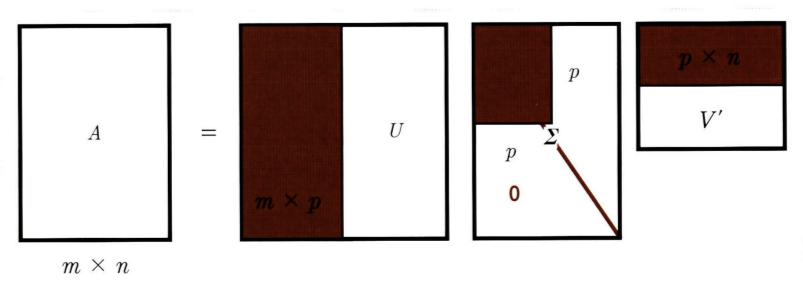  
- 희소 행렬(sparse matrix)에 대한 변환 가능 (<-> PCA: 밀집 행렬(dense matrix)에 대한 변환만 가능)
- 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴인식과 신호 처리 분야에 사용
- 텍스트 토픽 모델링 기법(LSA)의 기반 알고리즘 
- Truncated SVD: $\sum$의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함게 제거-> 더욱 차원을 줄인 형태로 분해
  - 인위적으로 더 작은 차원으로 분해 -> 원본 행렬 정확히 다시 복원은 불가능 but 원본행렬 근사 가능  
    -> 원래 차원의 차수에 가깝게 잘라낼수록 원본 행렬에 더 가깝게 복원 가능

- 넘파이를 이용해 SVD 연산 수행
  * 랜덤행렬 생성이유: 행렬의 개별 로우끼리 의존성을 없애기 위해서 

In [10]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [11]:
U, Sigma, Vt=svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


- 원본 행렬로 복원: U, Sigma, V 내적 
  * 유의할 점: Sigma의 경우, 0을 포함한 대칭행렬로 변환한 뒤 내적수행을 해야함

In [12]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_=np.dot(np.dot(U,Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- 데이터 세트가 로우 간 의존성이 있는 경우: 의존성 부여를 위해 a행렬의 3번째 로우를 '1번째로우+2번째로우'로 업데이트, '4번째로우=1번째로우'로 변경

In [13]:
a[2] = a[0]+a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [14]:
# 다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [15]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원 
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


- Truncated SVD를 이용해 행렬 분해

In [17]:
import numpy
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices = False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components=4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원: ', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원:  (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231

-> Truncated SVD로 분해된 행렬로 복원할 경우 근사적으로 복원됨

#### 사이킷런 TruncatedSVD 클래스를 이용한 변환
: PCA 클래스와 유사, 원본데이터를 몇개의 주요 컴포넌트로 차원을 축소해 변환함

- TruncatedSVD로 변환한 붓꽃데이터 세트

Text(0, 0.5, 'TruncatedSVD Component 2')

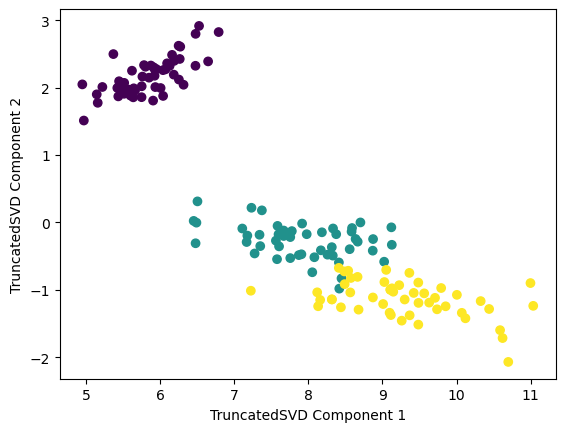

In [18]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 컴포넌트로 Truncated SVD 변환
tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

-> 품종별로 어느정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음 

Text(0.5, 1.0, 'PCA Transformed')

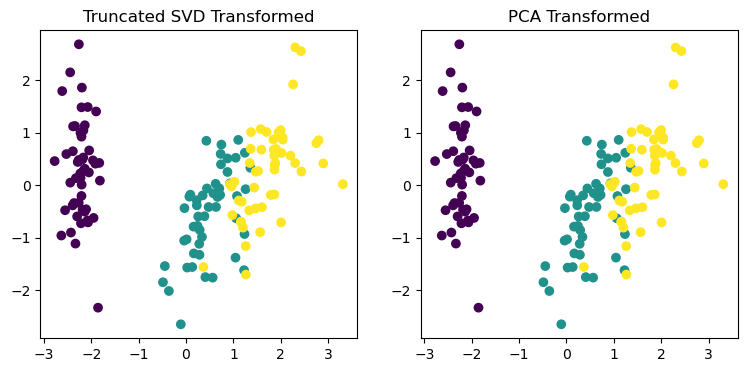

In [20]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TrancatedSVD 변환 수행
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols =2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

-> 두 개의 변환 행렬 값과 원본 속성별 컴포넌트 비율값 비교 -> 거의 같음 

In [22]:
print((iris_pca-iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.318932083393103e-15
2.6020852139652106e-18


-> 두개 모두 0에 가까운 값 -> 2개의 변환 서로 동일   
=> 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환 수행 

## 05. NMF(Non-Negative Matrix Factorization)
#### NMF 개요
- NMF
  - Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형
  - 원본 행렬 내의 모든 원소값이 모두 양수(0이상)임이 보장 -> 간단하게 두개의 기반 양수 행렬로 분해가능한 기법
   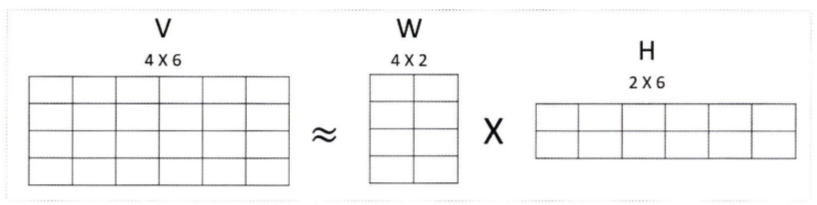  
  * 행렬분해: SVD와 같은 행렬 분해 기법 통칭
    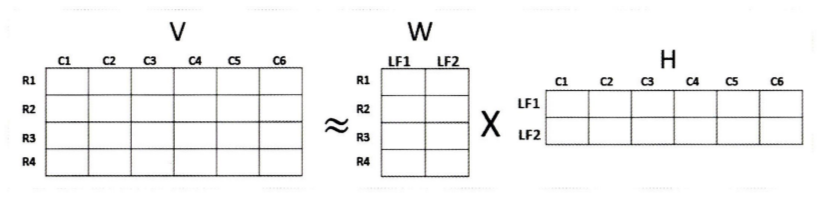  
    - H: 잠재 요소가 원본 열(=원본 속성)로 어떻게 구성됐는지 나타내는 행렬
    - W: 원본 행에 대해 이 잠재 요소의 값이 얼마나 되는지에 대응  
      => 잠재요소를 특성으로 가짐
  - 차원 축소-> 잠재요소 도출 -> 이미지 변환 및 압축, 텍스트의 토픽 도출 영역에서 사용
  - 추천(Recommendation) 영역: 사용자의 상품 평가 데이터 세트(사용자-평가 순위) -> 행렬분해 기법 -> 평가하지 않은 상품에 대한 잠재적 요소 추출  
    -> 평가 순위 예측, 높은 순위로 예측된 상품 추천 => 잠재요소(Latent Factoring) 기반 추천방식

- 붓꽃 데이터를 NMF를 이용해 2개의 컴포넌트로 변환 및 시각화 

C:\Users\leehj\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

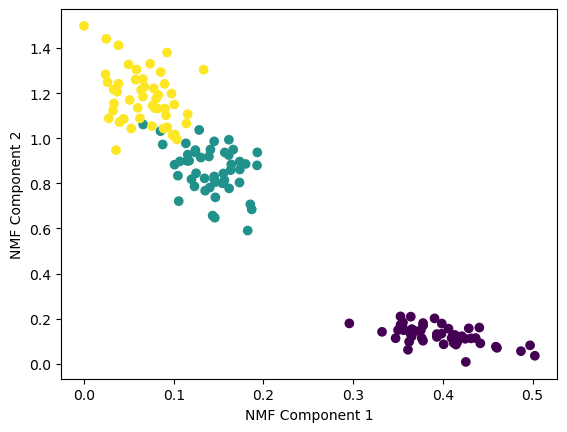

In [26]:
from sklearn.decomposition import NMF 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

## 06. 정리
- 차원축소 알고리즘
  1. PCA
  2. LDA
  3. SVD
  4. NMF
  - 많은 차원의 이미지 or 텍스트 : PCA, SVD
  - 매우 많은 피처 데이터를 가진 고차원 행렬 -> 두개의 저차원 행렬로 분리: SVD, NMF => 토픽 모델링, 추천 시스템에서 사용